In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import xarray as xr
import netCDF4

In [3]:
xr.open_dataset("/sintef/data/ocean_his.nc_2022092600")

<xarray.Dataset>
Dimensions:         (ocean_time: 24, s_w: 43, eta_rho: 899, xi_rho: 299, tracer: 2, s_rho: 42, boundary: 4, eta_psi: 898, xi_psi: 298, eta_u: 899, xi_u: 298, eta_v: 898, xi_v: 299)
Coordinates:
    lat_psi         (eta_psi, xi_psi) float64 ...
    lat_rho         (eta_rho, xi_rho) float64 ...
    lat_u           (eta_u, xi_u) float64 ...
    lat_v           (eta_v, xi_v) float64 ...
    lon_psi         (eta_psi, xi_psi) float64 ...
    lon_rho         (eta_rho, xi_rho) float64 ...
    lon_u           (eta_u, xi_u) float64 ...
    lon_v           (eta_v, xi_v) float64 ...
  * ocean_time      (ocean_time) datetime64[ns] 2022-09-26 ... 2022-09-26T23:...
  * s_rho           (s_rho) float64 -0.9881 -0.9643 -0.9405 ... -0.03571 -0.0119
  * s_w             (s_w) float64 -1.0 -0.9762 -0.9524 ... -0.04762 -0.02381 0.0
Dimensions without coordinates: eta_rho, xi_rho, tracer, boundary, eta_psi, xi_psi, eta_u, xi_u, eta_v, xi_v
Data variables: (12/99)
    AKt             (ocean_time, s_w, eta_rho, xi_rho) float32 ...
    AKv             (ocean_time, s_w, eta_rho, xi_rho) float32 ...
    Akk_bak         float64 ...
    Akp_bak         float64 ...
    Akt_bak         (tracer) float64 ...
    Akv_bak         float64 ...
    ...              ...
    v               (ocean_time, s_rho, eta_v, xi_v) float32 ...
    v_northward     (ocean_time, s_rho, eta_rho, xi_rho) float32 ...
    vbar            (ocean_time, eta_v, xi_v) float32 ...
    w               (ocean_time, s_w, eta_rho, xi_rho) float32 ...
    xl              float64 ...
    zeta            (ocean_time, eta_rho, xi_rho) float32 ...
Attributes: (12/33)
    file:              /home/havis/run/fjordos_cl1/ocean_his.nc
    format:            netCDF-3 64bit offset file
    Conventions:       CF-1.4, SGRID-0.3
    type:              ROMS/TOMS history file
    title:             ROMS
    var_info:          /home/havis/sea/ROMS/metroms_apps/fjordos_cl1/include/...
    ...                ...
    compiler_flags:    -xHost  -free -free
    tiling:            006x036
    history:           Mon Sep 26 19:11:33 2022: ncks -O --4 --dfl_lvl 3 -d o...
    ana_file:          ROMS/Functionals/ana_btflux.h, ROMS/Functionals/ana_sr...
    CPP_options:       FJORDOS, ADD_FSOBC, ADD_M2OBC, ALBEDO, ANA_BSFLUX, ANA...
    NCO:               netCDF Operators version 4.7.9 (Homepage = http://nco....

In [4]:
nc = netCDF4.Dataset("/sintef/data/ocean_his.nc_2022092600")
# nc = netCDF4.Dataset("/sintef/data/NorKyst800/ocean_his.an.20190716.nc")

In [5]:
lat_rho = nc.variables['lat_rho'][:]
lon_rho = nc.variables['lon_rho'][:]

import pyproj
proj_str= '+proj=stere +ellps=WGS84 +lat_0=90.0 +lat_ts=60.0 +x_0=3192800 +y_0=1784000 +lon_0=70'
proj = pyproj.Proj(proj_str)

x_rho, y_rho = proj(lon_rho, lat_rho, inverse = False)
x, y = x_rho[0], y_rho[:,0]

Text(0.5, 1.0, 'Bathymetry')

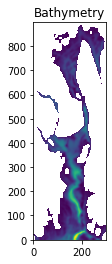

In [49]:
H = nc["h"][:]
plt.imshow(np.ma.array(H, mask=( H < H.min()+2)), origin="lower")
plt.title("Bathymetry")

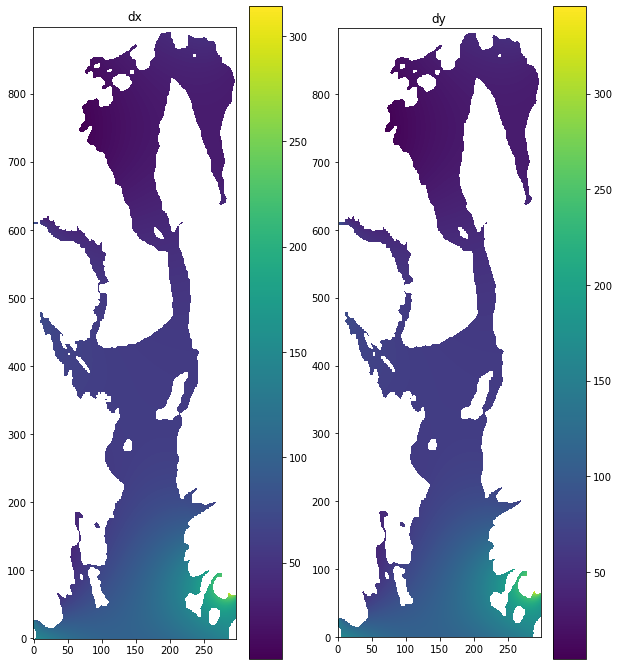

In [59]:
fig, axs = plt.subplots(1,2, figsize=(10,12))
im = axs[0].imshow(np.ma.array(x_rho[:,1:]-x_rho[:,:-1], mask=((H[:,1:]+H[:,:-1])/2 < H.min()+2)), origin="lower")
axs[0].set_title("dx")
fig.colorbar(im, ax=axs[0])
im = axs[1].imshow(np.ma.array(y_rho[1:,:]-y_rho[:-1,:], mask=((H[1:,:]+H[:-1,:])/2 < H.min()+2)), origin="lower")
axs[1].set_title("dy")
fig.colorbar(im, ax=axs[1])